<a href="https://colab.research.google.com/github/JIYEONGSTAR/Machine-Learning/blob/main/05_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

K-최근접 이웃 회귀와 선형 회뤼 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러 가지 선형 회귀 모델을 만들자


In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [5]:
# 2차원 배열로 만들기
train_input = train_input.reshape(-1,1)

In [6]:
test_input = test_input.reshape(-1,1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input,train_target)

KNeighborsRegressor()

In [8]:
print(knr.predict([[50]]))

[1010.]


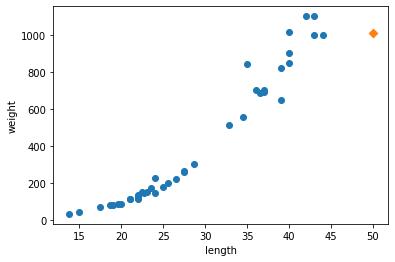

In [12]:
import matplotlib.pyplot as plt

plt.scatter(train_input,train_target)
plt.scatter(50,knr.predict([[50]]),marker = "D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [14]:
_,indexes = knr.kneighbors([[50]])

In [15]:
indexes

array([[34, 14,  8, 40,  6]])

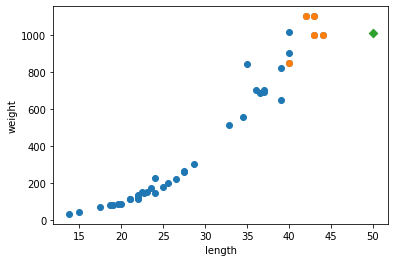

In [16]:
# 가장 가까운것도 표시

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes])
plt.scatter(50,knr.predict([[50]]),marker = "D") # 주변 5개의 무게의 평균
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
# 양의 상관관계는 가지고 있는데 터무니 없이 결과가 낮게 나오는 것 같다.

In [18]:
knr.predict([[100]])
#100cm도 50cm랑 결과값이 똑같다.

array([1010.])

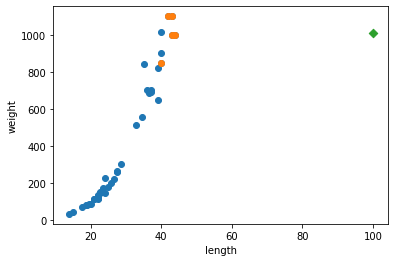

In [17]:
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes])
plt.scatter(100,knr.predict([[100]]),marker = "D") # 주변 5개의 무게의 평균
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [20]:
print(lr.predict([[50],[100]]))

[1241.83860323 3192.69585141]


In [21]:
print(lr.coef_) # 기울기
print(lr.intercept_) # 절편

[39.01714496]
-709.0186449535477


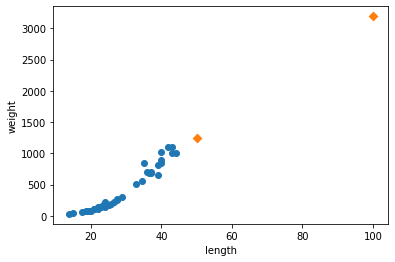

In [23]:
plt.scatter(train_input,train_target)
plt.scatter([50,100],lr.predict([[50],[100]]),marker = "D") # 선형회귀
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

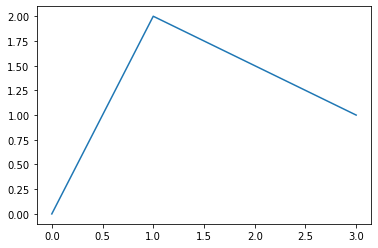

In [25]:
plt.plot([0,1,3],[0,2,1]) # 앞에는 x축의 좌표 뒤에는 y축의 좌표
plt.show()

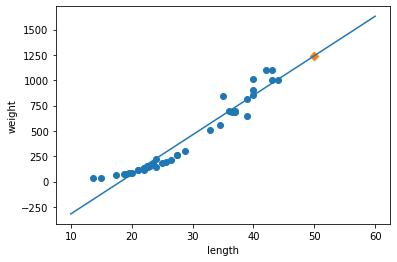

In [27]:
# 앞에서 결정된 기울기와 절편이 정해졌으니까. 15cm와 50cm의 각각의 예측값을 y값으로 해 그려주기
plt.scatter(train_input,train_target)
plt.plot([10,60],[lr.coef_*10+lr.intercept_, lr.coef_*60+lr.intercept_])
plt.scatter([50],lr.predict([[50]]),marker = "D") # 선형회귀
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


In [29]:
# 결정계수 확인
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


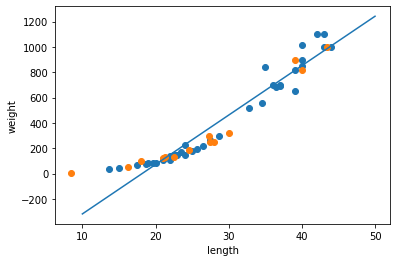

In [31]:
plt.scatter(train_input,train_target)
plt.plot([10,50],[lr.coef_*10+lr.intercept_, lr.coef_*50+lr.intercept_])
plt.scatter(test_input,test_target) # 테스트 세트 scatter
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


In [35]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [36]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [38]:
train_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [39]:
# 학습
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [43]:
# 결과값 예측
print(lr.predict([[50**2,50]])) # 50의 제곱과 50을 특성으로

[1573.98423528]


In [44]:
print(lr.coef_,lr.intercept_) 

[  1.01433211 -21.55792498] 116.0502107827827


In [45]:
# 결정계수 확인
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))
# 1차식보다 2차식이 더 좋은 선형회귀를 보인다. 하지만 테스트결과가 더좋다. 과소적합!

0.9706807451768623
0.9775935108325122


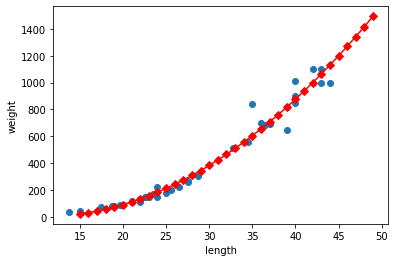

In [58]:
# 직선을 그릴 때는 단순하게 두 전을 가지고 plot을 하니까 잘 그려졌다.
# 2차원 그래프는 꺾은선 그래프이기 때문에 촘촘한 x값에 대한 각각의 예측값을 이어붙인다.

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다
point = np.arange(15,50) # 3번째 인자로 step의 값을 줄 수 있음,없으면 1단위

# 훈련세트 산점도
plt.scatter(train_input,train_target)
# 15에서 49 까지 2차방정식 그래프
plt.plot(point,lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_,marker = "D",color = "red") # 브로드캐스팅 연산
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

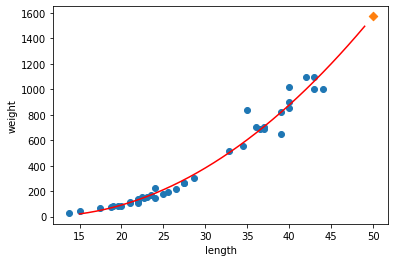

In [60]:
# 선호하는 방법

X = np.arange(15,50)
y = lr.coef_[0] * X ** 2 + lr.coef_[1] * X + lr.intercept_

plt.scatter(train_input,train_target)
plt.plot(X,y,color = "red") # 브로드캐스팅 연산
# 농어
plt.scatter(50,lr.predict([[50**2,50]]),marker = "D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

2차함수를 왜 선형이라 하나? 비선형 아닌가?

관점을 다르게 보면 x와 x제곱의 관계를 하나의 독립된 특성으로 보게 되면 2차식이라는 것들도 다항이긴 하지만 독립된 특성으로 보면 일반화시킬 수 있다.
각각의 특성과 가중치의 관계가 곱하고 더하고 곱하고 더하고로 이루어지기 때문에 1차함수와 다를게 없다.

단순하게 길이특성만 가지고 무게를 예측하고 있지만, 주가를 예측하면 거래량, 전날의 시가도 들어가고, 다양한 특성들이 들어간것을 곱하고 더하고 할 것이다.

이런 걸 **다항회귀(다중회귀)** 라고 한다.



# 정리

- 단순 선형 회귀
- 모델 파라미터
- 다항 회귀

k최근접 이웃 선형 알고리즘보다 더 좋은 모델 값을 가진다. 훈련세트 범위 밖의 샘플을 예측할 수 없다. ex) 50cm농어와 100cm 농어의 무게값이 같게 나온다.

선형회귀를 사용하면 가장 잘 맞는 직선의 방정식을 찾는다.
선형 회귀 모델의 coef_와 intercept_속성은 각각 기울기와 절편을 가리킨다.

다항회귀는 2차원 함수같이 항이 여러개일 때.

하지만 테스트 세트 성능이 더 좋은 과소적합된 경향이 나타난다.